In [2]:
import numpy as np
import scipy as sp
import math
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
R=8.314462 #J⋅K^-1⋅mol^−1
T=298     #K
v= 18.07  #(molar volume)cm^3 mol^-1 
N_av=6.023E+23

Working equations:
$$\Delta{G_{c}}=RT[K_{0}+K_{1}(\frac{{\sigma}_{c}}{{\sigma}_{1}})+K_{2}(\frac{{\sigma}_{c}}{{\sigma}_{1}})^{2}]$$ 
   where, $K_{0}=-ln(1-\xi)$ ; $K_{1}=u=\frac{3\xi}{(1-\xi)}$; $K_{2}=\frac{u(u+2)}{2}$ 

$$\Delta{H_{c}}=[\xi\alpha \frac{RT^{2}}{(1-\xi)^{3}}] [(1-\xi)^{2}+3(1-\xi)(\frac{{\sigma}_{c}}{{\sigma}_{1}}) + 3(1+2\xi)(\frac{{\sigma}_{c}}{{\sigma}_{1}})^{2}]$$ 
$$\Delta{H_{c}}=[\xi\alpha \frac{RT^{2}}{(1-\xi)^{3}}] [A_{0}+A_{1}(\frac{{\sigma}_{c}}{{\sigma}_{1}})+ A_{2}(\frac{{\sigma}_{c}}{{\sigma}_{1}})^{2}]$$ 
    where, $A_{0}=(1-\xi)^{2}$ ; $A_{1}=3(1-\xi)$ ; $A_{2}= 3(1+2\xi)$

In [5]:
epsilon = 0.383
alpha = 0.257E-03
r_c = 0.0001
sigma_1=2.80
r=sigma_1/2.0
f1=open('spt.data','a')
f2=open('spt_delG.data','w')
f3=open('spt.plot','w')
print('R_c        ', 'delG_c/ASA      ', 'delH_c/ASA     ', 'Surface tension    ', file=f2)
print('    ',file=f2)
print(format(0.0, '4.4f'), format(0.0, '15.5f'), format(0.0, '16.5f'),  format(433.5, '16.1f'), file=f2)
print(format(0.0, '4.4f'), format(0.0, '15.5f'), format(0.0, '16.5f'),  format(433.5, '16.1f'), file=f3)
for i in range (0,50000):
    r_c+=0.0005
    sigma_c = 2.0*r_c
    
    #Free energy of solvation
    K0=-np.log(1-epsilon)
    K1= 3.0*epsilon/(1-epsilon)
    K2= (K1*(K1+2))/2.0
    sigma= (sigma_c/sigma_1)
    R_c = r_c + r
    delG_c = R*T*((K0+(K1*(sigma))+(K2*(sigma)**2)))
    delG_c_ASA = delG_c/(4.0*math.pi*(R_c**2))
    
    #Enthalpy
    A0 = (1-(epsilon**2))
    A1 = 3*(1-epsilon)
    A2 = 3*(1+(2*epsilon))
    delH_c = (epsilon*alpha*((R*T**2)/(1-epsilon)**3))*(A0 + A1*(sigma) + A2*((sigma)**2))
    delH_c_ASA = delH_c/(4.0*math.pi*(R_c**2))
    print(format(R_c, '.2f'), format(delG_c_ASA, '.3f'), file=f1)
    print(format(R_c, '6.4f'), format(delG_c_ASA, '15.5f'), format(delH_c_ASA, '16.5f'), format(433.5, '16.1f'), file=f2)
    print(format(R_c, '6.4f'), format(delG_c_ASA, '15.5f'), format(delH_c_ASA, '16.5f'), format(433.5, '16.1f'), file=f3)   

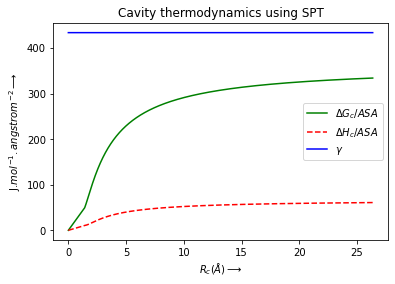

In [8]:
data = np.loadtxt('spt.plot')
Rc = data[:, 0]
delGc = data[:, 1]
delHc = data[:, 2]
gamma = data[:, 3]
plt.plot(Rc, delGc,'g-',label = r'$\Delta G_{c}/ASA$')
plt.plot(Rc, delHc,'r--',label = r'$\Delta H_{c}/ASA$')
plt.plot(Rc, gamma,'b-',label = r'$\gamma$' )
plt.title('Cavity thermodynamics using SPT')
plt.xlabel('$R_{c}(\AA)$$\longrightarrow$')
plt.ylabel('J.$mol^{-1}.angstrom^{-2}$$\longrightarrow$')
plt.legend()

plt.savefig('spt_delG_delH.jpg')